In [1]:
import pandas as pd
from plotnine import *

In [2]:
weather_meta = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021-metadatos.csv')
weather_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021.csv')

In [3]:
weather = (weather_raw
           .assign(**{'fecha': lambda df: pd.to_datetime(df['fecha'])})
           .assign(**{'mes': lambda df: df['fecha'].dt.month})
           .assign(**{'tmed': lambda df: df['tmed'].str.replace(',', '.').astype(float)})
           .assign(**{'tmax': lambda df: df['tmax'].str.replace(',', '.').astype(float)})
           .assign(**{'tmin': lambda df: df['tmin'].str.replace(',', '.').astype(float)})
           .assign(
                prec=lambda d: pd.to_numeric(
                d['prec'].astype(str).str.replace(',', '.', regex=False),
                errors='coerce'
            ).fillna(0.0))
           )

¿Cómo se relacionan las temperaturas mínimas y máximas diarias?

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\plotnine\layer.py:374: PlotnineWarning: geom_point : Removed 3077 rows containing missing values.


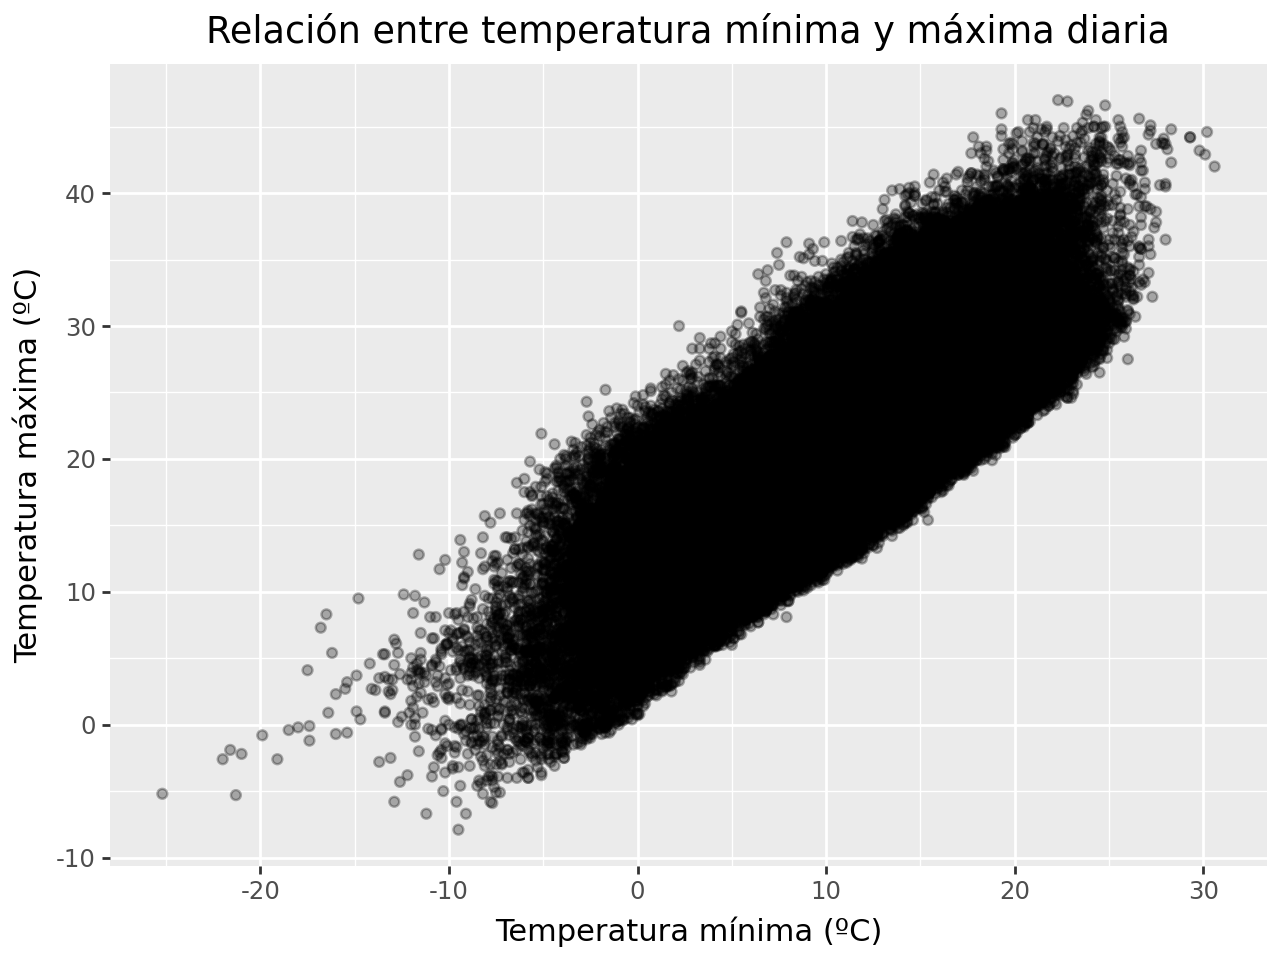

In [4]:
(
    ggplot(weather, aes(x='tmin', y='tmax')) +
    geom_point(alpha=0.3) +
    labs(
        title='Relación entre temperatura mínima y máxima diaria',
        x='Temperatura mínima (ºC)',
        y='Temperatura máxima (ºC)'
    )
)

¿Existe relación entre la temperatura media diaria y la cantidad de precipitación?

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\plotnine\layer.py:374: PlotnineWarning: geom_point : Removed 3077 rows containing missing values.


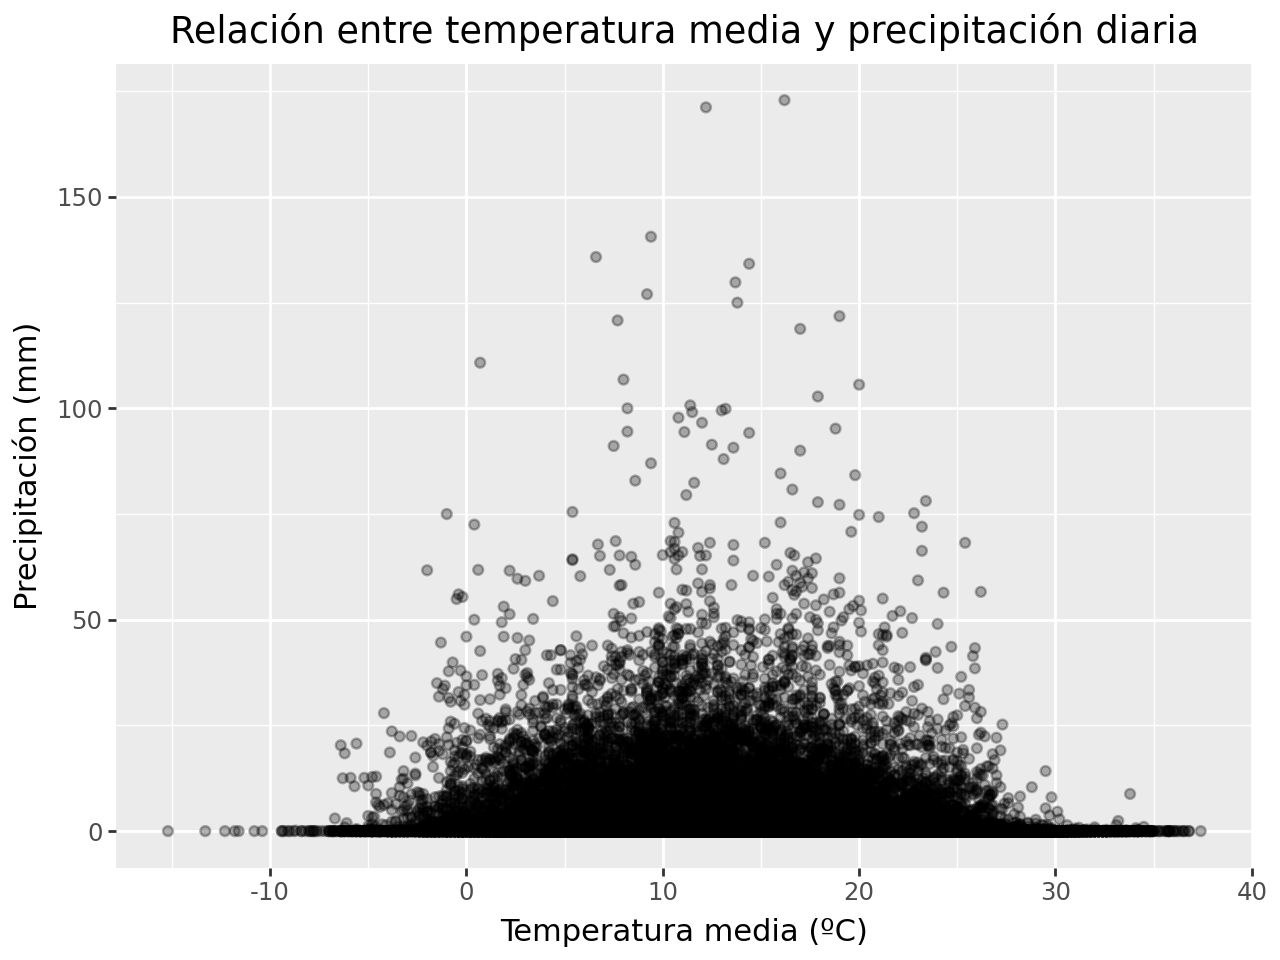

In [6]:
(
    ggplot(weather, aes(x='tmed', y='prec')) +
    geom_point(alpha=0.3) +
    labs(
        title='Relación entre temperatura media y precipitación diaria',
        x='Temperatura media (ºC)',
        y='Precipitación (mm)'
    )
)